In [1]:
#import libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\frame

In [2]:
df = pd.read_excel("../../../ai_algos/data/FuelConsumption.xlsx",encoding="utf_8")

#look at the dataset
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35,186
2,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37,175
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10,28,230
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25,264


In [3]:
#remove row '0' as it may cause issues
df.drop([0],axis=0,inplace=True)
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35,186
2,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37,175
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10,28,230
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25,264
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10,7,8.6,33,198


In [14]:
#check for Null
df.isnull().sum()

MODEL               15
MAKE                 2
MODEL.1             21
VEHICLE CLASS       21
ENGINE SIZE         21
CYLINDERS           21
TRANSMISSION        21
FUEL                21
FUEL CONSUMPTION    21
Unnamed: 9          21
Unnamed: 10         21
Unnamed: 11         21
CO2 EMISSIONS       21
dtype: int64

In [15]:
df["ENGINE SIZE"].fillna((df["ENGINE SIZE"].mean()),inplace=True)
df["CO2 EMISSIONS "].fillna((df["CO2 EMISSIONS "].mean()),inplace=True)

df.isnull().sum()

MODEL               15
MAKE                 2
MODEL.1             21
VEHICLE CLASS       21
ENGINE SIZE          0
CYLINDERS           21
TRANSMISSION        21
FUEL                21
FUEL CONSUMPTION    21
Unnamed: 9          21
Unnamed: 10         21
Unnamed: 11         21
CO2 EMISSIONS        0
dtype: int64

In [16]:
#define x and y values for the linear regression model
train_x = np.asanyarray(df[['ENGINE SIZE']])
#print(df.columns)
train_y = np.asanyarray(df[["CO2 EMISSIONS "]])

In [18]:
#initialize vaiables follow y= mx +b
m = tf.Variable(20.0)
b = tf.Variable(30.2)
y = m*train_x + b

In [19]:
#defien the loss function. we want to minimize the difference between the predicted and the actual values
loss = tf.reduce_mean(tf.square(y-train_y))

#decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. 
#You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. 
#Please review other material for further information on the optimization. 
#Here we will use a simple gradient descent with a learning rate of 0.05:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [20]:
#define the training method of the graph. 
#the minimize method will minimize the error function of the optimizer, resulting in a beteer model
train = optimizer.minimize(loss)


In [21]:
#initialize variables 

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [22]:
#start optimization
loss_values=[]
train_data = []

for step in range(100):
    _,loss_val, m_val, b_val = sess.run([train,loss,m,b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val,m_val,b_val)
        train_data.append([m_val,b_val])

0 23827.887 74.784454 45.103313
5 1822.3953 55.66347 45.03047
10 1733.1737 54.997692 49.371468
15 1663.9773 53.97377 53.36422
20 1602.4578 53.0173 57.131474
25 1547.7562 52.11519 60.683754
30 1499.1177 51.264553 64.03337
35 1455.8713 50.46244 67.191895
40 1417.4197 49.706097 70.17021
45 1383.228 48.9929 72.97863
50 1352.8278 48.32039 75.626816
55 1325.7969 47.686245 78.123924
60 1301.7621 47.08828 80.47858
65 1280.3917 46.524433 82.69889
70 1261.3899 45.99275 84.79254
75 1244.4955 45.491394 86.76675
80 1229.4729 45.01865 88.62831
85 1216.1155 44.572872 90.38368
90 1204.2386 44.152527 92.0389
95 1193.6788 43.75616 93.59969


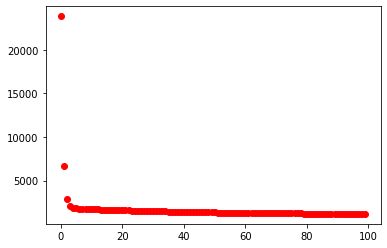

In [23]:
#plot the loss values to see how it has changed during training
plt.plot(loss_values,'ro')

C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


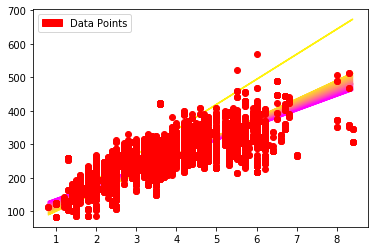

In [24]:
#visualize how the coefficient and intercept of line has changed to fit the data
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()